# 한국환경공단 대기오염정보

https://data.go.kr/index.do

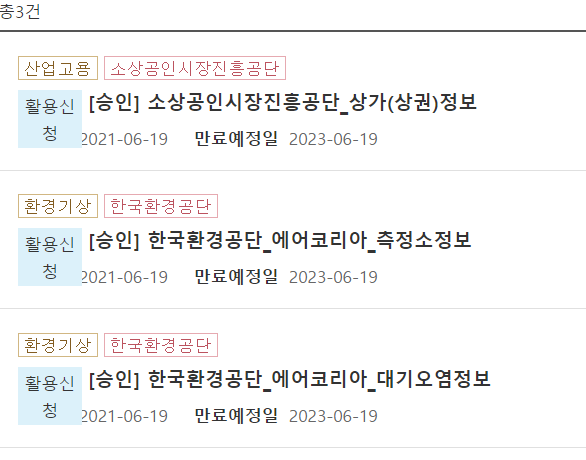

## 한국환경공단 측정소 정보

https://data.go.kr/iim/api/selectAPIAcountView.do

In [ ]:
# Python 샘플 코드 #


from urllib2 import Request, urlopen
from urllib import urlencode, quote_plus

url = 'http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getMsrstnList'
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : '서비스키', quote_plus('serviceKey') : '인증키(URL Encode)', quote_plus('returnType') : 'xml', quote_plus('numOfRows') : '100', quote_plus('pageNo') : '1', quote_plus('addr') : '서울', quote_plus('stationName') : '종로구' })

request = Request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print response_body

위의 코드는 옛날 코드라 잘 안되기 때문에 아래와 같이 수정한다. 

In [8]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus

skey = 'hE3HTSSSWcGNjCs9HXz50u5KC8GvlN7bnlXVXXfLOzuN9AHbIjug3XZV9%2Bxm4ksQNGITXVaheL7me3loDAzO2w%3D%3D'

url = 'http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getNearbyMsrstnList'

Params = '?' +'ServiceKey='+ skey + '&' + \
urlencode({quote_plus('tmX') : '244148.546388', 
           quote_plus('tmY') : '412423.75772', 
           quote_plus('ver') : '1.0' })
print(url+Params)

request = Request(url + Params)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print(response_body)

http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getNearbyMsrstnList?ServiceKey=hE3HTSSSWcGNjCs9HXz50u5KC8GvlN7bnlXVXXfLOzuN9AHbIjug3XZV9%2Bxm4ksQNGITXVaheL7me3loDAzO2w%3D%3D&tmX=244148.546388&tmY=412423.75772&ver=1.0
b'<?xml version="1.0" encoding="UTF-8"?>\r\n<response>\n  <header>\n    <resultCode>00</resultCode>\n    <resultMsg>NORMAL_CODE</resultMsg>\n  </header>\n  <body>\n    <items>\n      <item>\n        <tm>1236.7</tm>\n        <addr>\xec\xa0\x9c\xec\xa3\xbc\xed\x8a\xb9\xeb\xb3\x84\xec\x9e\x90\xec\xb9\x98\xeb\x8f\x84 \xec\x84\x9c\xea\xb7\x80\xed\x8f\xac\xec\x8b\x9c \xeb\x8c\x80\xec\xa0\x95\xec\x9d\x8d \xeb\x8f\x99\xec\x9d\xbc\xed\x95\x98\xeb\xaa\xa8\xeb\xa1\x9c149\xeb\xb2\x88\xea\xb8\xb8 21-8\xeb\x8c\x80\xec\xa0\x95\xec\xb2\xad\xec\x86\x8c\xeb\x85\x84\xec\x88\x98\xeb\xa0\xa8\xea\xb4\x80</addr>\n        <stationName>\xeb\x8c\x80\xec\xa0\x95\xec\x9d\x8d</stationName>\n      </item>\n      <item>\n        <tm>1238.7</tm>\n        <addr>\xec\xa0\x9c\xec\xa3\xbc \xec\xa0\x9c\xec

우선 어떤식으로 구성되어 있는지 알아 보기 위해서 기본적으로 실행 한후에,  
어떻게 판다스에 담을지를 생각한다.   
* 우선 xml 로 들어 오기 때문에 xml 을 핸들링 해준다. 
* 아래와 같이 되어 있기에 response_body 의 items 에서 item에서 

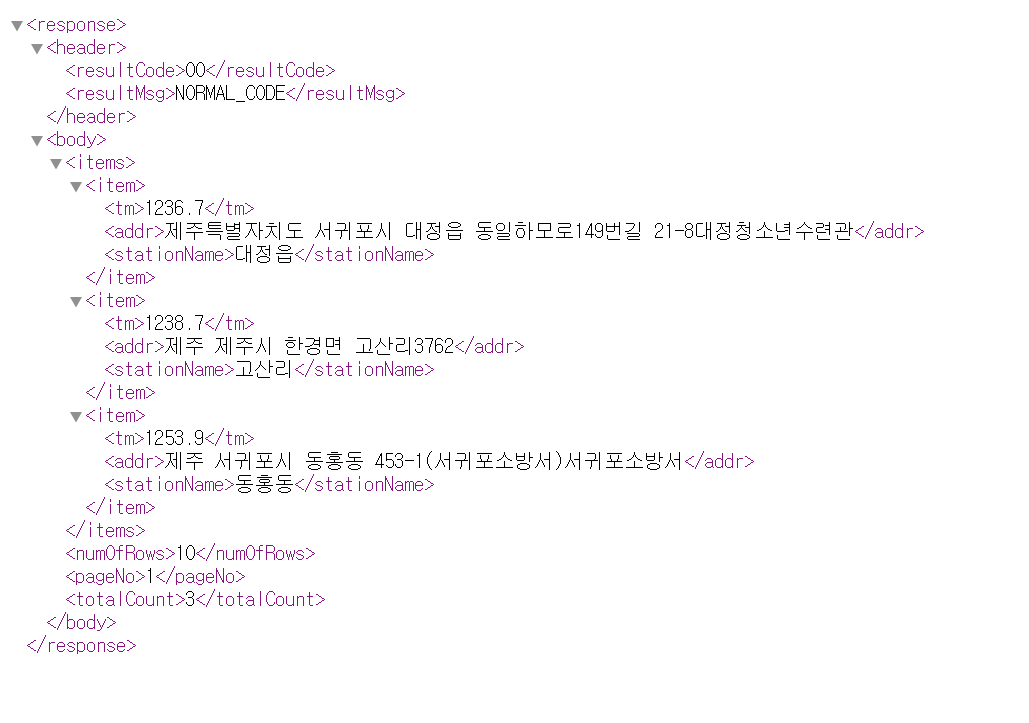

In [19]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
from xml.etree import ElementTree # xml 가져오기
import pandas as pd

skey = 'hE3HTSSSWcGNjCs9HXz50u5KC8GvlN7bnlXVXXfLOzuN9AHbIjug3XZV9%2Bxm4ksQNGITXVaheL7me3loDAzO2w%3D%3D'

url = 'http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getNearbyMsrstnList'

Params = '?' +'ServiceKey='+ skey + '&' + \
urlencode({quote_plus('tmX') : '244148.546388', 
           quote_plus('tmY') : '412423.75772', 
           quote_plus('ver') : '1.0' })
# print(url+Params)

request = Request(url + Params)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
# print(response_body)

root = ElementTree.fromstring(response_body)

df = pd.DataFrame()

idx =  0 
for item in root.iter('item'):
    item_dict = {}
    item_dict['stationName'] = item.find('stationName').text
    item_dict['addr'] = item.find('addr').text
    item_dict['tm'] = item.find('tm').text
    df.loc[idx,:]=[item_dict['stationName'],item_dict['addr'],item_dict['tm']]
    df = df.append(item_dict, ignore_index=True)
df

,addr,stationName,tm
0,동홍동,제주 서귀포시 동홍동 453-1(서귀포소방서)서귀포소방서,1253.9
1,제주특별자치도 서귀포시 대정읍 동일하모로149번길 21-8대정청소년수련관,대정읍,1236.7
2,제주 제주시 한경면 고산리3762,고산리,1238.7
3,제주 서귀포시 동홍동 453-1(서귀포소방서)서귀포소방서,동홍동,1253.9


## 환경환경공단 대기오염정도

https://data.go.kr/iim/api/selectAPIAcountView.do

### 측정소별 대기오염정도

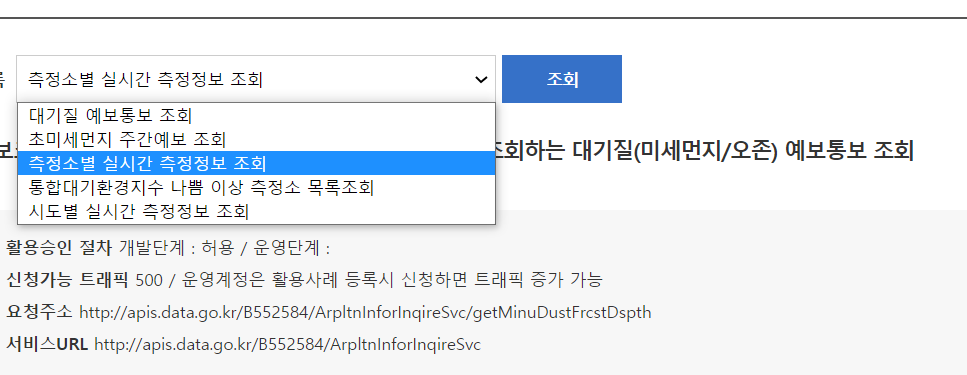

요청 주소   
http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty

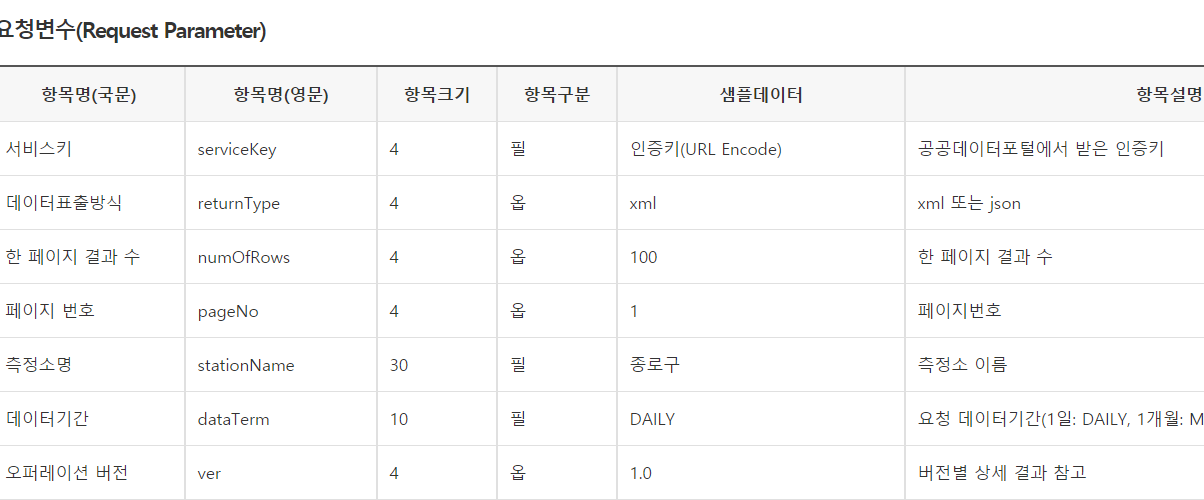

In [22]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
from xml.etree import ElementTree # xml 가져오기
import pandas as pd

skey = 'hE3HTSSSWcGNjCs9HXz50u5KC8GvlN7bnlXVXXfLOzuN9AHbIjug3XZV9%2Bxm4ksQNGITXVaheL7me3loDAzO2w%3D%3D'

url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty'

Params = '?' +'ServiceKey='+ skey + '&' + \
            urlencode({quote_plus('numOfRows') : '100', 
                       quote_plus('pageNo') : '1' ,
                       quote_plus('stationName') : '종로구' ,
                       quote_plus('dataTerm') : 'DAILY' ,
                       quote_plus('ver') : '1.3'  })

print(url+Params)

request = Request(url + Params)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
# print(response_body)

# root = ElementTree.fromstring(response_body)

# df = pd.DataFrame()

# idx =  0 
# for item in root.iter('item'):
#     item_dict = {}
#     item_dict['stationName'] = item.find('stationName').text
#     item_dict['addr'] = item.find('addr').text
#     item_dict['tm'] = item.find('tm').text
#     df.loc[idx,:]=[item_dict['stationName'],item_dict['addr'],item_dict['tm']]
#     df = df.append(item_dict, ignore_index=True)
# df

http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?ServiceKey=hE3HTSSSWcGNjCs9HXz50u5KC8GvlN7bnlXVXXfLOzuN9AHbIjug3XZV9%2Bxm4ksQNGITXVaheL7me3loDAzO2w%3D%3D&numOfRows=100&pageNo=1&stationName=%EC%A2%85%EB%A1%9C%EA%B5%AC&dataTerm=DAILY&ver=1.3


이제 위의 xml 결과와 상세 설명을 참고하여서 df 를 만든다. 

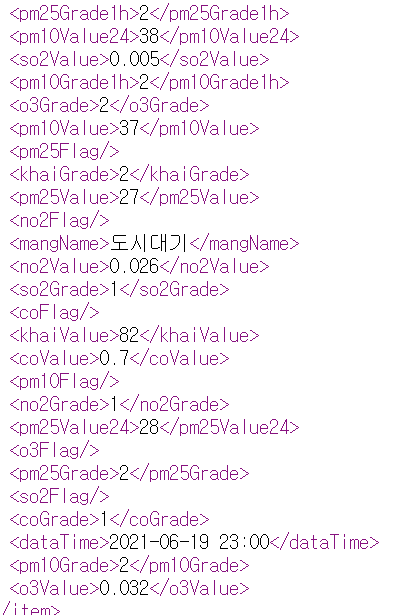

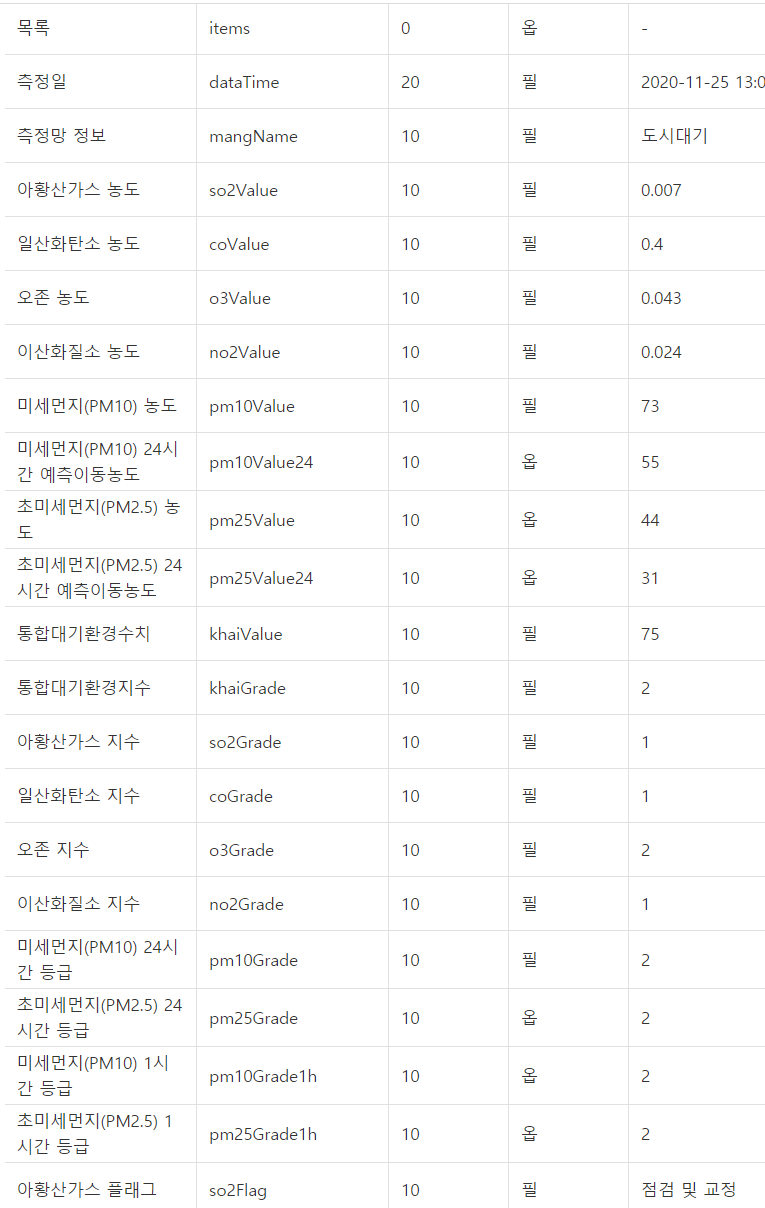


In [24]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
from xml.etree import ElementTree # xml 가져오기
import pandas as pd

skey = 'hE3HTSSSWcGNjCs9HXz50u5KC8GvlN7bnlXVXXfLOzuN9AHbIjug3XZV9%2Bxm4ksQNGITXVaheL7me3loDAzO2w%3D%3D'

url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty'

Params = '?' +'ServiceKey='+ skey + '&' + \
            urlencode({quote_plus('numOfRows') : '100', 
                       quote_plus('pageNo') : '1' ,
                       quote_plus('stationName') : '종로구' ,
                       quote_plus('dataTerm') : 'DAILY' ,
                       quote_plus('ver') : '1.3'  })

# print(url+Params)

request = Request(url + Params)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
# print(response_body)

root = ElementTree.fromstring(response_body)

df = pd.DataFrame()

idx =  0 
for item in root.iter('item'):
    item_dict = {}
    item_dict['dataTime'] = item.find('dataTime').text
    item_dict['mangName'] = item.find('mangName').text
    item_dict['pm25Grade1h'] = item.find('pm25Grade1h').text
    item_dict['pm10Value24'] = item.find('pm10Value24').text
    item_dict['so2Value'] = item.find('so2Value').text
    item_dict['pm10Grade1h'] = item.find('pm10Grade1h').text
    item_dict['o3Grade'] = item.find('o3Grade').text
    item_dict['pm25Flag'] = item.find('pm25Flag').text
    item_dict['khaiGrade'] = item.find('khaiGrade').text
    item_dict['pm25Value'] = item.find('pm25Value').text
    item_dict['no2Flag'] = item.find('no2Flag').text
    item_dict['no2Value'] = item.find('no2Value').text
    item_dict['so2Grade'] = item.find('so2Grade').text
    item_dict['coFlag'] = item.find('coFlag').text
    item_dict['khaiValue'] = item.find('khaiValue').text
    item_dict['coValue'] = item.find('coValue').text
    item_dict['pm10Flag'] = item.find('pm10Flag').text
    item_dict['no2Grade'] = item.find('no2Grade').text
    item_dict['pm25Value24'] = item.find('pm25Value24').text
    item_dict['o3Flag'] = item.find('o3Flag').text
    item_dict['pm25Grade'] = item.find('pm25Grade').text
    item_dict['so2Flag'] = item.find('so2Flag').text
    item_dict['coGrade'] = item.find('coGrade').text
    item_dict['pm10Grade'] = item.find('pm10Grade').text
    item_dict['o3Value'] = item.find('o3Value').text
    df = df.append(item_dict, ignore_index=True)

df

,coFlag,coGrade,coValue,dataTime,khaiGrade,khaiValue,mangName,no2Flag,no2Grade,no2Value,o3Flag,o3Grade,o3Value,pm10Flag,pm10Grade,pm10Grade1h,pm10Value24,pm25Flag,pm25Grade,pm25Grade1h,pm25Value,pm25Value24,so2Flag,so2Grade,so2Value
0,None,1,0.7,2021-06-19 24:00,2,82,도시대기,None,1,0.028,None,1,0.023,None,2,2,38,None,2,2,26,28,None,1,0.003
1,None,1,0.7,2021-06-19 23:00,2,82,도시대기,None,1,0.026,None,2,0.032,None,2,2,38,None,2,2,27,28,None,1,0.005
2,None,1,0.6,2021-06-19 22:00,2,79,도시대기,None,1,0.021,None,2,0.043,None,2,2,39,None,2,2,25,27,None,1,0.004
3,None,1,0.6,2021-06-19 21:00,2,79,도시대기,None,1,0.022,None,2,0.050,None,2,2,39,None,2,2,26,27,None,1,0.006
4,None,1,0.6,2021-06-19 20:00,2,79,도시대기,None,1,0.022,None,2,0.063,None,2,2,43,None,2,2,28,27,None,1,0.005
5,None,1,0.6,2021-06-19 19:00,2,93,도시대기,None,1,0.017,None,2,0.082,None,2,2,44,None,2,2,32,27,None,1,0.006
6,None,1,0.6,2021-06-19 18:00,3,109,도시대기,None,1,0.014,None,3,0.094,None,2,2,44,None,2,2,32,27,None,1,0.006
7,None,1,0.5,2021-06-19 17:00,3,126,도시대기,None,1,0.013,None,3,0.101,None,2,2,43,None,2,3,40,27,None,1,0.004
8,None,1,0.5,2021-06-19 16:00,3,164,도시대기,None,1,0.014,None,3,0.116,None,2,2,40,None,2,3,38,25,None,1,0.006
9,None,1,0.5,2021-06-19 15:00,3,159,도시대기,None,1,0.014,None,3,0.114,None,2,2,37,None,2,2,28,24,None,1,0.004


## 시도별 측정정보 조회

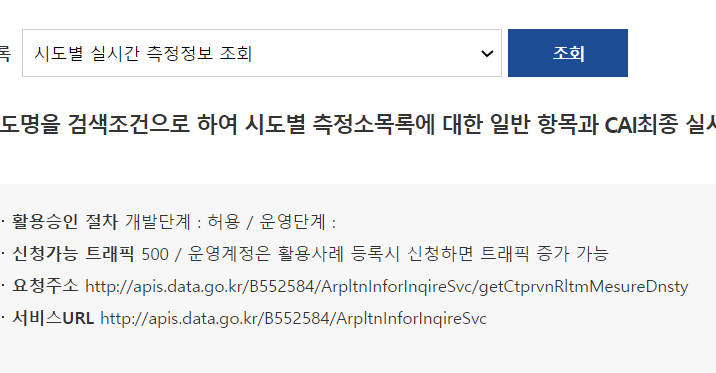

http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty

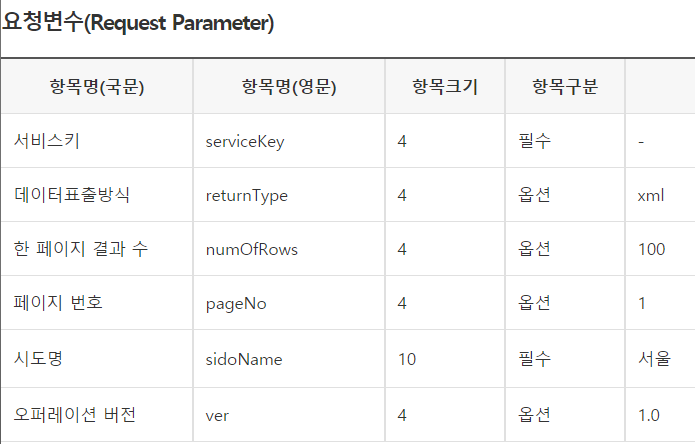

In [32]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
from xml.etree import ElementTree # xml 가져오기
import pandas as pd

skey = 'hE3HTSSSWcGNjCs9HXz50u5KC8GvlN7bnlXVXXfLOzuN9AHbIjug3XZV9%2Bxm4ksQNGITXVaheL7me3loDAzO2w%3D%3D'

url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'

Params = '?' +'ServiceKey='+ skey + '&' + \
            urlencode({quote_plus('numOfRows') : '100', 
                       quote_plus('pageNo') : '1' ,
                       quote_plus('sidoName') : '서울' ,
                       quote_plus('ver') : '1.0'  })

# print(url+Params)

request = Request(url + Params)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
# print(response_body)

root = ElementTree.fromstring(response_body)

df = pd.DataFrame()

idx =  0 
for item in root.iter('item'):
    item_dict = {}
    item_dict['dataTime'] = item.find('dataTime').text
    item_dict['stationName'] = item.find('stationName').text
    item_dict['so2Grade'] = item.find('so2Grade').text
    
    item_dict['coFlag'] = item.find('coFlag').text
    item_dict['khaiValue'] = item.find('khaiValue').text
    item_dict['so2Value'] = item.find('so2Value').text
    item_dict['coValue'] = item.find('coValue').text
    item_dict['pm25Flag'] = item.find('pm25Flag').text
    item_dict['pm10Flag'] = item.find('pm10Flag').text
    
    item_dict['o3Grade'] = item.find('o3Grade').text
    
    item_dict['pm10Value'] = item.find('pm10Value').text
    item_dict['no2Flag'] = item.find('no2Flag').text
    item_dict['khaiGrade'] = item.find('khaiGrade').text
    item_dict['pm25Value'] = item.find('pm25Value').text
    item_dict['sidoName'] = item.find('sidoName').text
    item_dict['o3Flag'] = item.find('o3Flag').text
    item_dict['no2Flag'] = item.find('no2Flag').text
    item_dict['no2Grade'] = item.find('no2Grade').text
    item_dict['pm25Grade'] = item.find('pm25Grade').text
    item_dict['coGrade'] = item.find('coGrade').text
    item_dict['so2Flag'] = item.find('so2Flag').text
    item_dict['no2Value'] = item.find('no2Value').text
    item_dict['pm10Grade'] = item.find('pm10Grade').text
    item_dict['o3Value'] = item.find('o3Value').text
    df = df.append(item_dict, ignore_index=True)
df  


http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty?ServiceKey=hE3HTSSSWcGNjCs9HXz50u5KC8GvlN7bnlXVXXfLOzuN9AHbIjug3XZV9%2Bxm4ksQNGITXVaheL7me3loDAzO2w%3D%3D&numOfRows=100&pageNo=1&sidoName=%EC%84%9C%EC%9A%B8&ver=1.0


,coFlag,coGrade,coValue,dataTime,khaiGrade,khaiValue,no2Flag,no2Grade,no2Value,o3Flag,o3Grade,o3Value,pm10Flag,pm10Grade,pm10Value,pm25Flag,pm25Grade,pm25Value,sidoName,so2Flag,so2Grade,so2Value,stationName
0,None,1,0.7,2021-06-19 24:00,2,87,None,2,0.049,None,1,0.008,None,2,44,None,2,29,서울,None,1,0.004,중구
1,None,1,0.8,2021-06-19 24:00,2,76,None,2,0.046,None,1,0.010,None,2,47,None,2,33,서울,None,1,0.004,한강대로
2,None,1,0.7,2021-06-19 24:00,2,82,None,1,0.028,None,1,0.023,None,2,34,None,2,26,서울,None,1,0.003,종로구
3,None,1,0.7,2021-06-19 24:00,2,90,None,2,0.032,None,1,0.020,None,2,43,None,2,30,서울,None,1,0.004,청계천로
4,None,1,0.6,2021-06-19 24:00,2,90,None,2,0.054,None,1,0.018,None,2,35,None,2,23,서울,None,1,0.003,종로
5,None,1,0.6,2021-06-19 24:00,2,82,None,1,0.024,None,1,0.016,None,2,38,None,2,27,서울,None,1,0.003,용산구
6,None,1,0.7,2021-06-19 24:00,2,72,None,1,0.026,None,1,0.019,None,2,38,None,2,23,서울,None,1,0.004,광진구
7,None,1,0.7,2021-06-19 24:00,2,85,None,2,0.033,None,1,0.025,None,2,40,None,2,29,서울,None,1,0.006,성동구
8,None,1,0.9,2021-06-19 24:00,2,74,None,2,0.039,None,1,0.016,None,2,42,None,2,30,서울,None,1,0.006,강변북로
9,None,1,0.6,2021-06-19 24:00,2,79,None,1,0.022,None,1,0.030,None,2,44,None,2,26,서울,None,1,0.004,중랑구


## 한국환경공단_에어코리아_대기오염통계 현황
https://data.go.kr/data/15073855/openapi.do
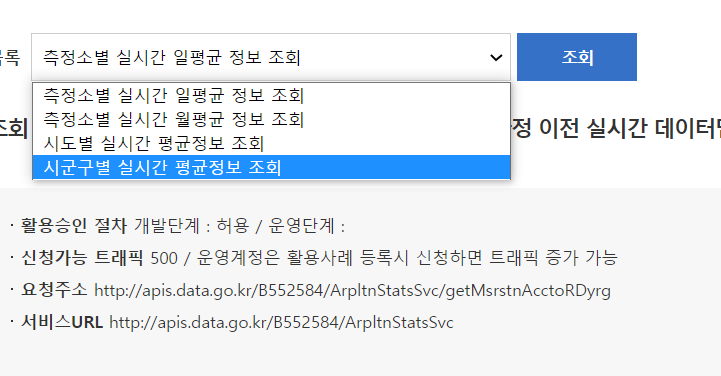